In [1]:
from glob import glob
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
Denoised_whole_brain =  [1.6215957060444766, 1.6096802355318782, 1.5454767646116887, 1.5614691905703877, 1.4763936008030627, 1.6007588377273272, 1.5904947304488761, 1.5247213647427333, 1.5160597341351472, 1.5572523936457174, 1.5183986499700572, 1.5602214646240589, 1.5216214574486506, 1.560965713420267, 1.5470847253886744, 1.5902486985988296, 1.5265762194834056, 1.48686294682343, 1.4764102027511916, 1.5394264484069955, 1.5149479373603834, 1.5556154505696322, 1.4781852768932857, 1.591968867042449, 1.6052851538649926, 1.5498171849506002, 1.5651334723524615, 1.5997571394816064, 1.5471599370109097, 1.5420822718331137, 1.6410086456121904, 1.610264050340862, 1.574641937531, 1.5693560579865304, 1.5806006467221239, 1.5623438292780534, 1.626070911400401, 1.5961554036744692, 1.513412519579987, 1.562614115520086, 1.620617436959558, 1.5877212122094821, 1.5062099563789546, 1.5920491476124516, 1.578083743793321, 1.5857377892967623, 1.5726456018777162, 1.6320337900151358, 1.5180651615927998, 1.5553785263903939, 1.6082356638978723, 1.5749484849192565, 1.596168167180676, 1.5686346910349158, 1.5716833417573692, 1.594271001302436, 1.602779960399219, 1.5669022212819208, 1.5511500780058063, 1.4985406720220171, 1.6490648922408118, 1.5960149690839915, 1.5327308323357864, 1.5434671589461155, 1.5932060769397116]
Denoised_gray_matter = [1.6004723748013305, 1.6218547211224295, 1.57915377811359, 1.6029156703924372, 1.6211344805489907, 1.6123903680998002, 1.6270059818676634, 1.615308616719226, 1.6008095992646734, 1.5535414897049864, 1.5866439444726892, 1.622313306544816, 1.528243638083145, 1.604977603684862, 1.6169348246146744, 1.6269575219045247, 1.6078127627475207, 1.5332985143231035, 1.5400666830455105, 1.6185933808347404, 1.5477028810032403, 1.6057277307190825, 1.531477958065074, 1.6427339318885559, 1.625567165728158, 1.6114524755582058, 1.6179477380964224, 1.6345621456816546, 1.6117903404456637, 1.5962408243983994, 1.6074047218177048, 1.6228572278728297, 1.6134965211182537, 1.6356107894304315, 1.6246794139625276, 1.5840813922276815, 1.6423548695158894, 1.612148373472533, 1.5957688808084132, 1.6015992592127495, 1.5739036203779737, 1.6067467053258444, 1.5686514318332407, 1.6267266929064843, 1.5833508483930543, 1.5848496973502832, 1.5539498919246184, 1.6130833242118396, 1.601863600534569, 1.5765137310266673, 1.62903942511229, 1.6446717252789371, 1.6314459247496955, 1.6227605839343195, 1.589973523477904, 1.6292881814353315, 1.616985154263544, 1.6188919913021507, 1.6177558120205058, 1.541160568251633, 1.6453231258055048, 1.6089824182236507, 1.5445849800690947, 1.5902270114040058, 1.6103371274138267]
Denoised_white_matter = [1.0824308843354213, 1.0764440781876852, 1.0201554646015212, 1.0700099453835514, 0.9910474571581765, 1.0649824077635541, 1.1150705157026153, 0.9933433145651316, 1.0107493726547658, 1.0025041442474913, 1.1094234567688366, 1.0716716222882743, 1.0306812450892207, 1.0366225492615144, 1.06300566532637, 1.0936509372754175, 1.0888259644370848, 0.997836447116267, 1.0199768948153296, 1.0867818825843203, 1.013049158377071, 1.0470975817515429, 1.0345808609843756, 1.125271915732417, 1.1185203257553935, 1.0864874127743618, 1.0399238202139083, 1.0565932074891629, 1.1076230011787447, 1.0518211864362979, 1.0956460598041051, 1.072981714598026, 1.1130335129431421, 1.1278195235821054, 1.0715708011051495, 1.0707147777677177, 1.0982242000524889, 1.0852583209865196, 1.0112219484602845, 1.0835365819443619, 1.053803408740379, 1.1010286384593249, 1.0422179547886101, 1.150001297387274, 1.0396031554873926, 1.0358627476253153, 0.9961396898603698, 1.0711202280721626, 1.1006544263037918, 1.0260758795947418, 1.0812066967133491, 1.1373998692950043, 1.145988337368244, 1.136746191186882, 1.0463189878734893, 1.04753321424974, 1.0864517568607026, 1.0806313010136013, 1.0565603912331858, 1.0319325696220554, 1.0920831382160117, 1.039024112276136, 1.0144571226151733, 1.028482559038507, 1.0661648920514628]
GT_whole_brain = [1621.5957060444764, 1609.6802355318782, 1545.4767646116888, 1561.4691905703876, 1476.3936008030628, 1600.7588377273273, 1590.494730448876, 1524.7213647427336, 1516.059734135147, 1557.2523936457176, 1518.3986499700575, 1560.2214646240589, 1521.6214574486505, 1560.9657134202669, 1547.084725388674, 1590.2486985988298, 1526.5762194834056, 1486.86294682343, 1476.4102027511915, 1539.4264484069954, 1514.9479373603835, 1555.6154505696325, 1478.1852768932856, 1591.9688670424491, 1605.2851538649925, 1549.8171849505998, 1565.1334723524617, 1599.7571394816061, 1547.1599370109095, 1542.0822718331137, 1641.0086456121905, 1610.2640503408625, 1574.6419375310002, 1569.3560579865305, 1580.6006467221239, 1562.3438292780534, 1626.070911400401, 1596.1554036744687, 1513.4125195799872, 1562.6141155200855, 1620.6174369595583, 1587.7212122094818, 1506.2099563789543, 1592.049147612452, 1578.083743793321, 1585.7377892967625, 1572.6456018777164, 1632.033790015136, 1518.0651615928, 1555.378526390394, 1608.2356638978722, 1574.9484849192565, 1596.1681671806762, 1568.6346910349157, 1571.6833417573694, 1594.271001302436, 1602.7799603992194, 1566.9022212819207, 1551.1500780058063, 1498.5406720220171, 1649.0648922408118, 1596.0149690839914, 1532.730832335786, 1543.4671589461154, 1593.2060769397115]
GT_gray_matter = [1600.4723748013305, 1621.8547211224295, 1579.1537781135903, 1602.9156703924373, 1621.1344805489907, 1612.3903680998003, 1627.0059818676634, 1615.3086167192264, 1600.8095992646731, 1553.541489704986, 1586.6439444726889, 1622.3133065448158, 1528.2436380831448, 1604.977603684862, 1616.9348246146742, 1626.9575219045244, 1607.8127627475205, 1533.2985143231035, 1540.0666830455104, 1618.5933808347404, 1547.70288100324, 1605.7277307190825, 1531.4779580650743, 1642.733931888556, 1625.567165728158, 1611.4524755582058, 1617.9477380964224, 1634.5621456816546, 1611.7903404456638, 1596.240824398399, 1607.4047218177047, 1622.85722787283, 1613.4965211182537, 1635.6107894304316, 1624.6794139625276, 1584.081392227681, 1642.3548695158893, 1612.148373472533, 1595.7688808084133, 1601.5992592127498, 1573.9036203779735, 1606.7467053258447, 1568.6514318332413, 1626.7266929064847, 1583.350848393054, 1584.8496973502831, 1553.9498919246184, 1613.0833242118395, 1601.8636005345688, 1576.513731026667, 1629.0394251122898, 1644.6717252789372, 1631.4459247496952, 1622.7605839343198, 1589.973523477904, 1629.2881814353316, 1616.9851542635445, 1618.8919913021505, 1617.7558120205058, 1541.160568251633, 1645.3231258055046, 1608.9824182236512, 1544.5849800690949, 1590.2270114040057, 1610.3371274138267]
GT_white_matter =  [1082.4308843354215, 1076.4440781876851, 1020.155464601521, 1070.0099453835514, 991.0474571581766, 1064.982407763554, 1115.070515702615, 993.3433145651314, 1010.7493726547659, 1002.5041442474914, 1109.4234567688363, 1071.6716222882744, 1030.6812450892207, 1036.6225492615145, 1063.00566532637, 1093.6509372754174, 1088.8259644370848, 997.8364471162666, 1019.9768948153297, 1086.7818825843203, 1013.049158377071, 1047.0975817515427, 1034.580860984376, 1125.2719157324173, 1118.5203257553937, 1086.4874127743617, 1039.9238202139084, 1056.5932074891628, 1107.623001178745, 1051.821186436298, 1095.6460598041049, 1072.981714598026, 1113.0335129431421, 1127.8195235821054, 1071.5708011051495, 1070.714777767718, 1098.2242000524889, 1085.2583209865195, 1011.2219484602844, 1083.536581944362, 1053.803408740379, 1101.028638459325, 1042.21795478861, 1150.0012973872738, 1039.6031554873928, 1035.8627476253155, 996.1396898603699, 1071.1202280721627, 1100.6544263037918, 1026.0758795947418, 1081.2066967133494, 1137.399869295004, 1145.988337368244, 1136.746191186882, 1046.3189878734893, 1047.5332142497402, 1086.4517568607027, 1080.6313010136014, 1056.5603912331858, 1031.9325696220558, 1092.0831382160115, 1039.024112276136, 1014.4571226151733, 1028.4825590385071, 1066.1648920514629]

In [3]:
GT_gray_matter_series = pd.Series(GT_gray_matter)
GT_white_matter_series = pd.Series(GT_white_matter)

In [4]:
GT_gray_matter_series = GT_gray_matter_series / 1000
GT_white_matter_series = GT_white_matter_series / 1000

In [5]:
Denoised_white_matter_series = pd.Series(Denoised_white_matter)
Denoised_gray_matter_series = pd.Series(Denoised_gray_matter)

Text(0, 0.5, 'Percent difference')

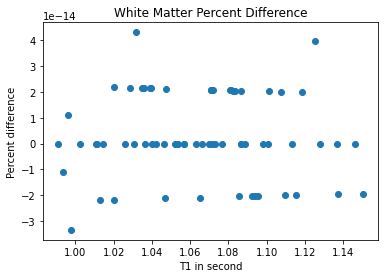

In [6]:
white_matter_percent_dif = ((GT_white_matter_series-Denoised_white_matter_series)/GT_white_matter_series)*100
m, b = np.polyfit(white_matter_percent_dif, GT_white_matter_series, 1)
plt.title('White Matter Percent Difference')
plt.scatter(GT_white_matter_series, white_matter_percent_dif)
# plt.plot(GT_white_matter_series, (m*GT_white_matter_series)+b, color='red')
plt.xlabel('T1 in second') 
plt.ylabel('Percent difference')

Text(0, 0.5, 'Percent difference')

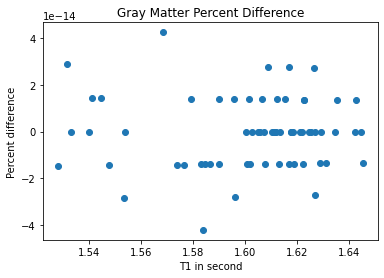

In [9]:
gray_matter_percent_dif = ((GT_gray_matter_series-Denoised_gray_matter_series)/GT_gray_matter_series)*100
# m, b = np.polyfit(gray_matter_percent_dif, GT_gray_matter_series, 1)
plt.title('Gray Matter Percent Difference')
plt.scatter(GT_gray_matter_series, gray_matter_percent_dif)
# plt.plot(GT_gray_matter_series, (m*GT_gray_matter_series)+b, color='red')
plt.xlabel('T1 in second') 
plt.ylabel('Percent difference')